<a href="https://colab.research.google.com/github/trinhvanypro1/-DataAnalystDeepLearning/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from tensorflow.keras.utils import to_categorical

In [51]:
# đưa tập dữ liệu huấn luyện và tập dữ liệu test load vào hàm load_data
(x_train,y_train),(x_test,y_test)= mnist.load_data()
#in ra dữ liệu trong tập data mnist 60000 tấm ảnh trắng đen có kích thước 28x28 px
print('x_train shape: ',x_train.shape)

x_train shape:  (60000, 28, 28)


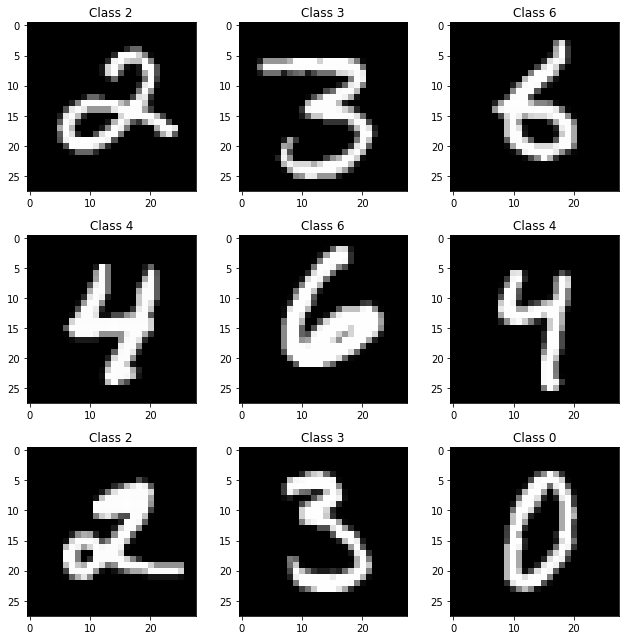

In [52]:
#Hiển thị ngẫu nhiên các tấm ảnh trong tập train:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  #hiển thị ma trận 9x9
  plt.subplot(3,3,i+1)
  #lấy ngẫu nhiên số bức ảnh từ 0 đến độ dài (x_train)
  num=random.randint(0,len(x_train))
  #in ra số trong bức ảnh với kích thước 28x28px
  plt.imshow(x_train[num].reshape(28,28),cmap='gray',interpolation=None)
  #Hiển thị title của bức ảnh với giá trị tương ứng
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()

***Formatting the input data layer***

In [53]:
#Đổi kích thước đầu vào bức ảnh dạng vector để truyền vào mạng neural:
#Kích thước bức ảnh là 28x28=784
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
#Chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255:
x_train/=255

In [54]:
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

In [57]:
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)

NameError: ignored

In [ ]:
#xây dựng model
model = Sequential()
# thêm vào 1 lớp input, có 10 neural(10 neural), mỗi neural có 784 input
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))

In [ ]:
# thêm vào lớp hidden sẽ tự động alasy đầu vào của lớp đầu, giá trị hidden có thể thay đổi
model.add(Dense(40))
model.add(Activation('relu'))

In [ ]:
#thêm vào lớp đầu ra từ 0 - 9
model.add(Dense(10))
# Dùng hàm softmax vì đầu ra là 10 lớp
#Với các bài toán classification(phân loại) thì nếu có 2 lớp hàm activation ở output layer
#là hàm sigmoi còn nhiều hơn 2 lớp thì hàm activation ở output layer là hàm softmax
model.add(Activation('softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics==['accuracy'])
#Mỗi lần lấy 128 tấm ảnh để huấn luyện
model.fit(x_train,y_train,batch_size=128,epochs=5)
#dự báo mô hình, giá trị dự báo được lưu vào biến predicted_classes
#giá trị thực tế được lưu ở tập t_test
predicted_classes=model.predict(x_test)

In [ ]:
#Hiển thị 9 tấm ảnh ngẫu nhiên trong tập test
#hiển thị kết quá dữ báo của 9 tấm ảnh theo mô hình neural vừa xây dựng
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()